# Исследование тарифных планов

Компании «Мегалайн» — федеральный оператора сотовой связи.
Предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов (500 пользователей «Мегалайна»): кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**

Тариф «Смарт»:
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»:
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей.

**Описание данных:**

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана.

Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок.

Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение.

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя.

Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

***План работы:***
- изучить общую информацию;
- провести предобработку данных (привести данные к нужным типаи, избавиться от ошибок, убрать пропуски);
- проанализировать данные (описать поведение клиентов оператора: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы, описать распределения);
- проверить гипотезы;
- сделать общий вывод.

# Открытие файла с данными и изучение общей информации

**Загрузим необходимые библиотеки.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', None)

**Загрузим датасеты.**

In [2]:
#users = pd.read_csv('users.csv')
#calls = pd.read_csv('calls.csv')
#messages = pd.read_csv('messages.csv')
#internet = pd.read_csv('internet.csv')
#tariffs = pd.read_csv('tariffs.csv')

In [3]:
import os

def my_read_csv(pth1, pth2):
    """Функция для чтения файла по двум путям.

    Args:
        pth1 (str): Первый путь.
        pth2 (str): Второй путь.

    Returns:
        DataFrame: DataFrame из csv.

    """
    
    if os.path.exists(pth1):
        return pd.read_csv(pth1)
    elif os.path.exists(pth2):
        return pd.read_csv(pth2)
    else:
        print('Something is wrong')
        return None

pth1 = 'calls.csv'
pth2 = '/datasets/calls.csv'
calls = my_read_csv(pth1, pth2)

pth1 = 'internet.csv'
pth2 = '/datasets/internet.csv'
internet = my_read_csv(pth1, pth2)

pth1 = 'messages.csv'
pth2 = '/datasets/messages.csv'
messages = my_read_csv(pth1, pth2)

pth1 = 'tariffs.csv'
pth2 = '/datasets/tariffs.csv'
tariffs = my_read_csv(pth1, pth2)

pth1 = 'users.csv'
pth2 = '/datasets/users.csv'
users = my_read_csv(pth1, pth2)

**Выведем первые строки датасетов. Проверим пропуски и дубликаты.**

In [4]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
users.info() # вывод общей информации по датасету users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Имеем 500 строк, 8 столбцов. Типы данных `int64` и `object`. В столбце `churn_date` есть пропуски. По описанию в этом столбце хранится информация о дате прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Значит эти пропуски трогать не будем. Ещё необходимо преобразовать данные столбца `reg_date` в формат `datetime`.

In [7]:
calls.head(10) # вывод первых 10 строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [8]:
calls.info() # вывод общей информации по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В талице 202607 строк, 4 столбца. Пропуски отсутствуют. Типы данных: `float`, `int` и `object`. Необходимо привести столбец `call_date` к формату `datetime`. В описании сказано, что оператор всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Поэтому необходимо округлить значения в столбце `duration`. Сделаем это на следующем этапе.

In [10]:
messages.head(10) # вывод первых 10 строк таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
messages.info() # вывод общей информации по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В талице 123036 строк, 3 столбца. Пропуски отсутствуют. Типы данных: `int` и `object`. Необходимо привести столбец `message_date` к формату `datetime`.

In [13]:
internet.head(10) # вывод первых 10 строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [14]:
internet.info() # вывод общей информации по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [15]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


`5` колонок, `149396` строк. Типы данных: `float`, `int` и `object`. Пропуски отсутсвуют.

Необходимо:
* привести столбец `session_date` к формату `datetime`;
* округлить значения столбца `mb_used ` до целых значений;
* удалить столбец `Unnamed: 0`.

In [16]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Тут, вроде, всё нормально.

# Подготовка данных.

**Исправим формат даты:**

In [17]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d") 
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d") 
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [18]:
# добавим столбец объём потраченного за сессию интернет-трафика (в гигабайтах)
internet['gb_used'] = (internet['mb_used'] / 1024)

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Удалим столбец `Unnamed: 0`

In [20]:
internet.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True)

In [21]:
internet.head()

,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,0.110303
1,1000_1,1052.81,2018-09-07,1000,1.028135
2,1000_2,1197.26,2018-06-25,1000,1.169199
3,1000_3,550.27,2018-08-22,1000,0.537373
4,1000_4,302.56,2018-09-24,1000,0.295469


**Посчитаем для каждого пользователя:**

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя

Добавим в 3 базовые таблицы (`calls`, `messages`, `internet`) колонку с месяцем:

In [22]:
# добавление столбца с месяцем
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
display(calls.head(), messages.head(), internet.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,1000_2,1197.26,2018-06-25,1000,1.169199,6
3,1000_3,550.27,2018-08-22,1000,0.537373,8
4,1000_4,302.56,2018-09-24,1000,0.295469,9


In [23]:
# округление длительности звонков и приведение к целочисленному формату
calls['duration'] = calls['duration'].apply(np.ceil).astype(int) 

In [24]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам
calls_group = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index() 
calls_group.columns = ['user_id', 'month', 'total_calls', 'total_minutes']

# количество отправленных сообщений по месяцам
messages_group = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_group.columns = ['user_id', 'month', 'total_messages']

# объем израсходованного интернет-трафика по месяцам
internet_group = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
internet_group.columns = ['user_id', 'month', 'total_gb']

display(calls_group.head(10))
display(messages_group.head(10))
display(internet_group.head(10))

,user_id,month,total_calls,total_minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


,user_id,month,total_gb
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
5,1000,10,14.357900
6,1000,11,14.410615
7,1000,12,9.587510
8,1001,11,17.997402
9,1001,12,13.707676


In [25]:
# TOP10 пользователей по количеству сделанных звонков
calls_group.sort_values(by='total_calls', ascending=False).head(10).reset_index(drop=True)

,user_id,month,total_calls,total_minutes
0,1467,12,244,1673
1,1377,3,203,1609
2,1216,12,198,1435
3,1222,10,196,1322
4,1196,12,189,1213
5,1341,8,188,1321
6,1377,12,185,1259
7,1377,7,185,1311
8,1222,12,184,1261
9,1060,12,184,1233


In [26]:
# TOP10 пользователей с самым большим количеством потраченных минут
calls_group.sort_values(by='total_minutes', ascending=False).head(10).reset_index(drop=True)

,user_id,month,total_calls,total_minutes
0,1467,12,244,1673
1,1377,3,203,1609
2,1216,12,198,1435
3,1196,6,176,1410
4,1377,10,178,1401
5,1474,12,156,1345
6,1168,10,176,1334
7,1222,10,196,1322
8,1341,8,188,1321
9,1377,7,185,1311


In [27]:
# TOP10 пользователей по количеству отправленных сообщений
messages_group.sort_values(by='total_messages', ascending=False).head(10).reset_index(drop=True)

,user_id,month,total_messages
0,1165,12,224
1,1028,10,223
2,1231,7,211
3,1231,6,201
4,1165,11,197
5,1300,10,191
6,1231,12,191
7,1167,10,190
8,1231,9,188
9,1231,10,185


In [28]:
# TOP10 пользователей по использованию интернет трафика
internet_group.sort_values(by='total_gb', ascending=False).head(10).reset_index(drop=True)

,user_id,month,total_gb
0,1124,10,48.579775
1,1240,8,47.218350
2,1255,7,44.121787
3,1300,11,43.258652
4,1060,12,42.901719
5,1240,5,42.797754
6,1180,10,42.553340
7,1240,12,42.309863
8,1380,12,42.289551
9,1024,11,42.097139


Объединим три этих датасета в один.

In [29]:
calls_msgs = calls_group.merge(messages_group, how='outer')
calls_msgs_gb = calls_msgs.merge(internet_group, how='outer')
calls_msgs_gb.head(10)

,user_id,month,total_calls,total_minutes,total_messages,total_gb
0,1000,5,22.0,159.0,22.0,2.200674
1,1000,6,43.0,172.0,60.0,22.689229
2,1000,7,47.0,340.0,75.0,13.675430
3,1000,8,52.0,408.0,81.0,13.726494
4,1000,9,58.0,466.0,57.0,14.227451
5,1000,10,57.0,350.0,73.0,14.357900
6,1000,11,43.0,338.0,58.0,14.410615
7,1000,12,46.0,333.0,70.0,9.587510
8,1001,11,59.0,430.0,NaN,17.997402
9,1001,12,63.0,414.0,NaN,13.707676


In [30]:
calls_msgs_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   total_calls     3174 non-null   float64
 3   total_minutes   3174 non-null   float64
 4   total_messages  2717 non-null   float64
 5   total_gb        3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [31]:
calls_msgs_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   total_calls     3174 non-null   float64
 3   total_minutes   3174 non-null   float64
 4   total_messages  2717 non-null   float64
 5   total_gb        3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [32]:
calls_msgs_gb.duplicated().sum() # проверим на дубликаты

0

**Рассчёт помесячной выручки с каждого пользователя:**

Для расчёта помесячной выручки с каждого пользователя необходимо:

* рассчитать звонки, сообщения и интернет-трафик сверх лимита пакета тарифа;
* рассчитать стоимость сверхлимитных опций;
* рассчитать суммарные затраты потребителя, включающие сумму абонентской платы и оплаты за сверхлимит.

In [33]:
# Добавим информацию о тарифе и характеристиках тарифа, к которому подключен каждый пользователь.
user_total = calls_msgs_gb.merge(users, on='user_id', how='outer')
user_total.drop(['age', 'first_name', 'last_name'], axis='columns', inplace=True)
user_total.head()

,user_id,month,total_calls,total_minutes,total_messages,total_gb,churn_date,city,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2.200674,NaN,Краснодар,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,22.689229,NaN,Краснодар,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,13.675430,NaN,Краснодар,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,13.726494,NaN,Краснодар,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,14.227451,NaN,Краснодар,2018-05-25,ultra


Добавим в таблицу `user_total`информацию о характеристиках тарифа.
Но, сначала, переведём мегабайты в гигабайты. Также переименуем столбец с названием тарифа.

In [34]:
# добавление столбца с гигабайтами
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [35]:
# переименование столбца с тарифами
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb',
                   'rub_per_message', 'rub_per_minute', 'tariff', 'gb_per_month_included']

In [36]:
# объединим данные таблиц user_total и tariffs
user_total = user_total.merge(tariffs, on='tariff', how='left')
user_total.drop(['mb_per_month_included'], axis='columns', inplace=True) # удалим столбец с мегабайтами
user_total.head()

,user_id,month,total_calls,total_minutes,total_messages,total_gb,churn_date,city,reg_date,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5.0,22.0,159.0,22.0,2.200674,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0
1,1000,6.0,43.0,172.0,60.0,22.689229,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0
2,1000,7.0,47.0,340.0,75.0,13.675430,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0
3,1000,8.0,52.0,408.0,81.0,13.726494,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0
4,1000,9.0,58.0,466.0,57.0,14.227451,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0


In [37]:
user_total.isna().sum()

user_id                     0
month                       2
total_calls                42
total_minutes              42
total_messages            499
total_gb                   13
churn_date               3027
city                        0
reg_date                    0
tariff                      0
messages_included           0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

Появились пропуски. В столбцах с минутами, сообщениями и гигабайтами такие пропуски можно и нужно заполнить нулями.

In [38]:
user_total['total_minutes'] = user_total['total_minutes'].fillna(0)
user_total['total_messages'] = user_total['total_messages'].fillna(0)
user_total['total_gb'] = user_total['total_gb'].fillna(0)

**Округлим значения в датасете `user_total` в столбце `total_minutes` и `total_gb`  до целого вверх:**

In [39]:
# «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
# Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
# Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 
# Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
user_total['total_gb'] = user_total['total_gb'].apply(np.ceil).astype(int)

**Теперь добавим столбцы со значениями сверхлимитного использования.**

In [40]:
# Количество минут разговора сверх лимита
user_total['minutes_over_limit'] = user_total['total_minutes'] - user_total['minutes_included']
user_total.loc[user_total['minutes_over_limit'] < 0, 'minutes_over_limit'] = 0

# Количество сообщений сверх лимита
user_total['messages_over_limit'] = user_total['total_messages'] - user_total['messages_included']
user_total.loc[user_total['messages_over_limit'] < 0, 'messages_over_limit'] = 0

# Объём использованного трафика сверх лимита
user_total['gb_over_limit'] = user_total['total_gb'] - user_total['gb_per_month_included']
user_total.loc[user_total['gb_over_limit'] < 0, 'gb_over_limit'] = 0

In [41]:
user_total.head()

,user_id,month,total_calls,total_minutes,total_messages,total_gb,churn_date,city,reg_date,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_over_limit,messages_over_limit,gb_over_limit
0,1000,5.0,22.0,159.0,22.0,3,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0
1,1000,6.0,43.0,172.0,60.0,23,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0
2,1000,7.0,47.0,340.0,75.0,14,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0
3,1000,8.0,52.0,408.0,81.0,14,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0
4,1000,9.0,58.0,466.0,57.0,15,NaN,Краснодар,2018-05-25,ultra,1000,3000,1950,150,1,1,30.0,0.0,0.0,0.0


**Рассчитаем стоимость сверхлимитных опций:**

In [42]:
user_total['payment_over_limit'] = (user_total['minutes_over_limit'] * user_total['rub_per_minute'] +
                               user_total['messages_over_limit'] * user_total['rub_per_message'] +
                               user_total['gb_over_limit'] * user_total['rub_per_gb'])

**Итоговые затраты абонента:**

In [43]:
user_total['monthly_total'] = (user_total['rub_monthly_fee'] + user_total['payment_over_limit'])
revenue = user_total.pivot_table(index=['user_id', 'month'], values='monthly_total', aggfunc='sum').reset_index()
revenue['monthly_total'] = revenue['monthly_total'].astype(int)

**Доход компании с каждого абонента:**

In [44]:
# TOP10 пользователей с самыми большими суммарными расходами
revenue.sort_values(by='monthly_total', ascending=False).head(10).reset_index(drop=True)

,user_id,month,monthly_total
0,1486,12.0,6770
1,1042,12.0,5709
2,1486,11.0,5680
3,1261,12.0,5672
4,1286,12.0,5321
5,1159,12.0,5252
6,1098,12.0,5014
7,1124,10.0,4800
8,1261,11.0,4664
9,1240,8.0,4650


In [45]:
print('Суммарная выручка оператора связи "Мегалайн" за 2018 год составила {} рублей.'.format(revenue['monthly_total'].sum()))

Суммарная выручка оператора связи "Мегалайн" за 2018 год составила 4914451 рублей.


**Подведём итоги:**
* перевели данные столбцов с датами в формат `datetime`;
* избавились от непонятного столбца  в датасете `internet`;
* добавили стобец с месяцем в датасеты;
* объединили несколько датасетов в один;
* округлили в большую сторону данные с количеством потраченных минут и интернет трафика;
* избавились от пропусков после объединения таблиц;
* собрали информацию о совершённых звонках и минутах разговора, количестве сообщений, объёме использованного интернет-трафика.
* рассчитали ежемесячную выручку компании, приходящаяя от каждого из пользователей.

Максимальная выручка с клиента, которую компания получила за месяц в 2018 году (декабрь) составила 6614 рублей. Общая выручка составила боллее 4,8 млн. рублей.

# Анализ данных

Опишем поведение клиентов оператора, исходя из выборки:
* сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
* рассчитаем среднее количество, дисперсию и стандартное отклонение;
* постром гистограммы;
* опишем распределения.

In [46]:
# сводка числовых значений в датасете user_total  по тарифу smart
smart_total = user_total.query('tariff == "smart"')
smart_total.describe()

,user_id,month,total_calls,total_minutes,total_messages,total_gb,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_over_limit,messages_over_limit,gb_over_limit,payment_over_limit,monthly_total
count,2230.000000,2229.000000,2223.000000,2230.000000,2230.000000,2230.000000,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1246.562332,8.346792,58.621233,417.747534,33.369058,16.321525,50.0,500.0,550.0,200.0,3.0,3.0,15.0,41.586996,5.797309,2.987444,739.641704,1289.641704
std,146.110501,2.920316,25.796101,190.476754,28.230396,5.756167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.664160,13.440001,3.682537,818.370799,818.370799
min,1001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.0,500.0,550.0,200.0,3.0,3.0,15.0,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,10.000000,13.000000,50.0,500.0,550.0,200.0,3.0,3.0,15.0,0.000000,0.000000,0.000000,0.000000,550.000000
50%,1240.000000,9.000000,60.000000,421.500000,28.000000,17.000000,50.0,500.0,550.0,200.0,3.0,3.0,15.0,0.000000,0.000000,2.000000,471.000000,1021.000000
75%,1376.000000,11.000000,76.000000,545.000000,51.000000,20.000000,50.0,500.0,550.0,200.0,3.0,3.0,15.0,45.000000,1.000000,5.000000,1200.000000,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38.000000,50.0,500.0,550.0,200.0,3.0,3.0,15.0,935.000000,93.000000,23.000000,6220.000000,6770.000000


In [47]:
# сводка числовых значений в датасете user_total  по тарифу ultra
ultra_total = user_total.query('tariff == "ultra"')
ultra_total.describe()

,user_id,month,total_calls,total_minutes,total_messages,total_gb,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_over_limit,messages_over_limit,gb_over_limit,payment_over_limit,monthly_total
count,986.000000,985.000000,951.000000,986.000000,986.000000,986.000000,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.000000,986.000000,986.000000
mean,1262.957404,8.250761,76.016824,526.089249,49.313387,19.474645,1000.0,3000.0,1950.0,150.0,1.0,1.0,30.0,0.0,0.0,0.800203,120.030426,2070.030426
std,140.689268,2.871762,42.403348,317.887549,47.806040,9.868057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.506771,376.015578,376.015578
min,1000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1000.0,3000.0,1950.0,150.0,1.0,1.0,30.0,0.0,0.0,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,43.000000,282.500000,6.000000,12.000000,1000.0,3000.0,1950.0,150.0,1.0,1.0,30.0,0.0,0.0,0.000000,0.000000,1950.000000
50%,1277.000000,9.000000,75.000000,518.000000,38.000000,19.000000,1000.0,3000.0,1950.0,150.0,1.0,1.0,30.0,0.0,0.0,0.000000,0.000000,1950.000000
75%,1381.000000,11.000000,105.000000,751.750000,78.750000,27.000000,1000.0,3000.0,1950.0,150.0,1.0,1.0,30.0,0.0,0.0,0.000000,0.000000,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49.000000,1000.0,3000.0,1950.0,150.0,1.0,1.0,30.0,0.0,0.0,19.000000,2850.000000,4800.000000


Рассчитаем необходимые параметры и выведем их значения в одной таблице:

In [48]:
user_total.pivot_table(index = 'tariff', 
                    values = ['total_minutes',
                              'total_messages',
                              'total_gb'], 
                    aggfunc = ['median',
                               'mean',
                               'var',
                               'std']
                   )

median                                    mean                 \
       total_gb total_messages total_minutes   total_gb total_messages   
tariff                                                                   
smart        17           28.0         421.5  16.321525      33.369058   
ultra        19           38.0         518.0  19.474645      49.313387   

                            var                                     std  \
       total_minutes   total_gb total_messages  total_minutes  total_gb   
tariff                                                                    
smart     417.747534  33.133453     796.955256   36281.393836  5.756167   
ultra     526.089249  97.378544    2285.417425  101052.493549  9.868057   

                                     
       total_messages total_minutes  
tariff                               
smart       28.230396    190.476754  
ultra       47.806040    317.887549

Построим гистограммы распределения:

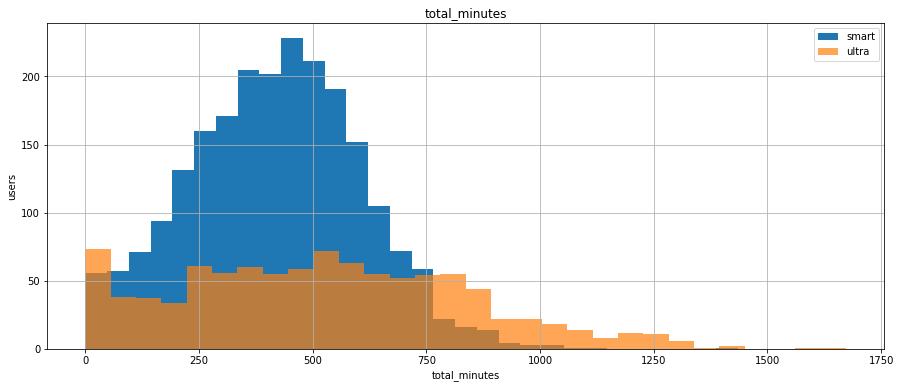

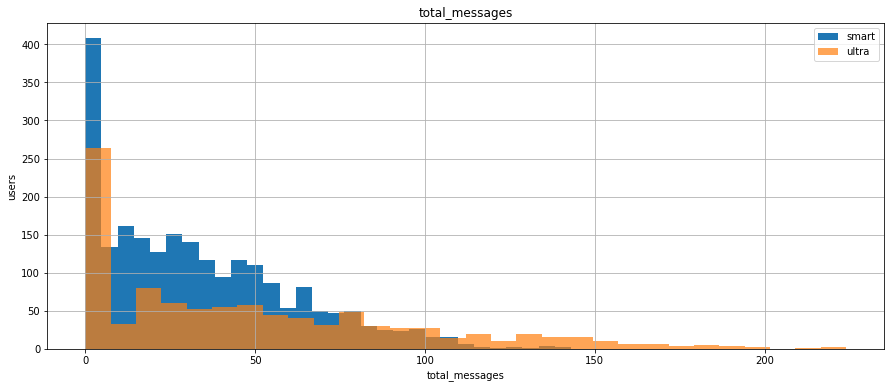

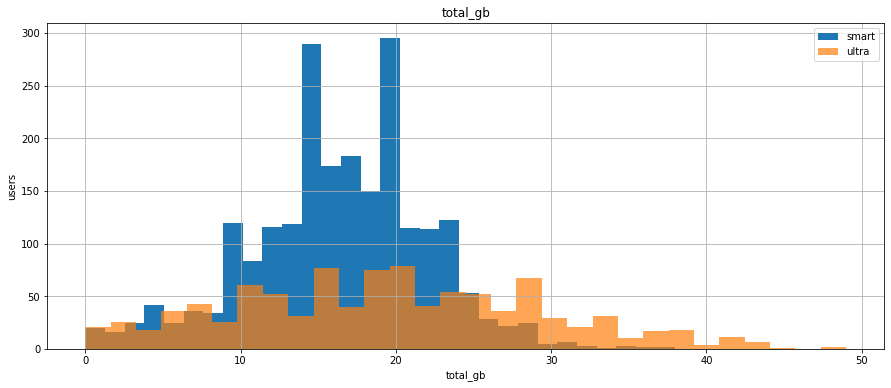

In [49]:
list_of_columns=['total_minutes','total_messages','total_gb']

tariffs = ['ultra','smart']
for column in list_of_columns:
        user_total.loc[user_total.loc[:,'tariff'] == 'smart'][column].plot(
            kind = 'hist',
            bins = 30,
            label = 'smart', 
            figsize = (15,6),
            grid=True
        )
        user_total.loc[user_total.loc[:,'tariff'] == "ultra"][column].plot(
            kind = 'hist',
            bins = 30,
            alpha =0.7,
            label = 'ultra',
            figsize = (15,6),
            grid=True
        )
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('users')
        plt.legend()
        plt.show()

Медиана и среднее для помесячной выручки и гистограмма распределения.

In [50]:
user_total.pivot_table(index = 'tariff', 
                    values = 'monthly_total', 
                    aggfunc = ['median',
                               'mean'
                              ]
                   )

,median,mean
,monthly_total,monthly_total
tariff,,
smart,1021.0,1289.641704
ultra,1950.0,2070.030426


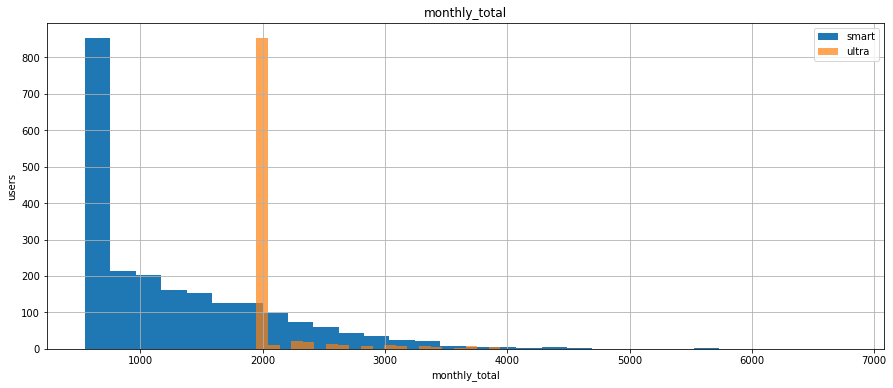

In [51]:
user_total.loc[user_total.loc[:,'tariff'] == 'smart']['monthly_total'].plot(
    kind = 'hist',
    bins = 30,
    label = 'smart', 
    figsize = (15,6),
    grid=True
)
user_total.loc[user_total.loc[:,'tariff'] == "ultra"]['monthly_total'].plot(
    kind = 'hist',
    bins = 30,
    alpha =0.7,
    label = 'ultra',
    figsize = (15,6),
    grid=True
)
plt.title('monthly_total')
plt.xlabel('monthly_total')
plt.ylabel('users')
plt.legend()
plt.show()

**Тариф `smart`:**

* ежемесячная длительность разговоров изменялась с января по декабрь 2018 года в пределах от 0 минут до 1355 минут;
* медианное значением 398 минут (около 13 минут в день); 
* количество отправленных сообщений - с 0 до 143 сообщений с медианным значением 28 сообщений.
* количество используемого интернет-трафика колебалось от 0Гб до 38гб с медианным значением 17Гб;
* в тарифе чаще уходят за рамки тарифного пакета.

**Тариф `ultra`:**

* ежемесячная длительность разговоров изменялась с января по декабрь 2018 года в пределах от 0 минут до 1579 минут;
* медианное значением 489 минут (около 16 минут в день); 
* количество отправленных сообщений - с 0 до 224 сообщений с медианным значением 38 сообщений;
* количество используемого интернет-трафика колебалось от 0Гб до 49гб с медианным значением 19Гб;
* медианные и средние значения выше, чем в тарифе `smart`, следовательно тариф `ultra` приносит больше выручки.

# Проверка гипотез:

Гипотезы:
* средняя выручка пользователей тарифов `ultra` и `smart` различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Гипотеза: средняя выручка пользователей тарифов `ultra` и `smart` различаются**

Есть две выборки: пользователи тарифов `ultra` и `smart`. Выборки являются независимыми. Согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. 
Выберем уровень значимости равным 5%. Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
* Нулевая гиротеза (H0): средняя выручка пользователей тарифов `ultra` и `smart` равны.
* Альтернативная гипотеза (H1): средняя выручка пользователей тарифов `ultra` и `smart` различается.

In [52]:
revenue_smart = smart_total['monthly_total']
revenue_ultra = ultra_total['monthly_total']
alpha = .05
results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу.


In [53]:
user_total.pivot_table(index = 'tariff', 
                    values = 'monthly_total', 
                    aggfunc = ['median',
                               'mean'
                              ]
                   )

,median,mean
,monthly_total,monthly_total
tariff,,
smart,1021.0,1289.641704
ultra,1950.0,2070.030426


p-значение оказалось меньше уровня значимости в 5%. Отвергаем нулевую гипотезу. Принимаем альтернативную гипотезу: средние двух совокупностей не равны между собой. То есть, средняя выручка пользователей тарифов `ultra` и `smart` различаются.

**Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Создадим выборки для пользователей из Москвы: users_Moscow, и других регионов: users_other.

In [54]:
users_Moscow = smart_total.query('city == "Москва"')
users_other = smart_total.query('city != "Москва"')

Есть две выборки: пользователи в Москве и пользователи других регионов. Выборки являются независимыми. Согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Выберем уровень значимости равным 5%. Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

* Нулевая гиротеза (H0): средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
* Альтернативная гипотеза (H1): средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [55]:
revenue_Moscow = users_Moscow['monthly_total']
revenue_other = users_other['monthly_total']
alpha = .05
results = st.ttest_ind(revenue_Moscow, revenue_other, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.15741281346674899
Не получилось отвергнуть нулевую гипотезу.


p-значение оказалось больше уровня значимости в 5%. Мы не можем отвергнуть нулевую гипотезу и принять альтернативную гипотезу.
Значит средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов..

# Общий вывод

Проведено исследование тарифов `smart` и `ultra`, которые предлагает компания «Мегалайн».
Анализ провели на основе имеющихся исходных данных:
* о пользователях;
* о звонках;
* о сообщениях;
* об интернет-сессиях;
* о тарифах.

Сначала провели изучение общих данных. Затем была сделана предобработка данных (изменение типа, исправление ошибок, расчёт дополнительных показателей). Значительных ошибок в данных выявлено не было. 
Были подготовлены пользовательские данные:
* собрана информация о совершённых звонках и минутах разговора;
* количестве сообщений;
* объёме использованного интернет-трафика.

По результатам статистического анализа выявили, что доходы от тарифа `ultra` больше, чем от тарифа `smart`: в среднем `Мегалайн` от одного пользователя в месяц получает 2070 рублей и 1257 рублей соответственно.

Особенности использования тарифов заключаются в следующем:
* Пользователям тарифа `smart` не хватает услуг в рамках тарифного пакета.
* Пользователи тарифа `ultra` не используют тарифный пакет в полном объеме.

Предварительное изучение данных показало, что пользователи, как правило, отдают предпочтение только одной из опций тарифа: либо звонкам, либо сообщениям, либо интернету. Лидеры по использованию одного из направлений не являются лидерами по другим направлениям. После чего была рассчитана ежемесячная выручка компании, приходящая от каждого из пользователей. Максимальная выручка с клиента, которую компания получила за месяц в 2018 году (декабрь) составила 6614 рублей. Общая выручка составила боллее 4,8 млн. рублей.

Проведены t-тесты, в результате которых было выявлено, что средняя выручка пользователей тарифов `ultra` и `smart` различается; а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
